In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
# accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random
import math
from dtw import dtw

In [76]:
# load data
HHC07 = pd.read_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/ThesisPlots/Results/EPICLE/HHC07/HHC07r1e1001.csv', header=None)
LSM13 = pd.read_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/ThesisPlots/Results/EPICLE/LSM13/LSM13r1e1001.csv', header=None)
MP15 = pd.read_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/ThesisPlots/Results/EPICLE/MP15/MP15r1e1001.csv', header=None)

In [77]:
# rename columns to ['Actual','Predicted', 'R2', 'MSE', 'RMSE', 'Round', 'Adjusted R2']
HHC07.columns = ['Actual','Predicted', 'R2', 'MSE', 'RMSE', 'Round', 'Adjusted R2']
LSM13.columns = ['Actual','Predicted', 'R2', 'MSE', 'RMSE', 'Round', 'Adjusted R2']
MP15.columns = ['Actual','Predicted', 'R2', 'MSE', 'RMSE', 'Round', 'Adjusted R2']

In [58]:
LSM13

,Actual,Predicted,R2,MSE,RMSE,Round,Adjusted R2
0,-0.360444,-0.008956,-0.010374,0.941675,0.970399,1,-0.011130
1,-0.196696,-0.014624,-0.010374,0.941675,0.970399,1,-0.011130
2,-0.726488,-0.007303,-0.010374,0.941675,0.970399,1,-0.011130
3,0.344563,0.027480,-0.010374,0.941675,0.970399,1,-0.011130
4,-0.120816,-0.102125,-0.010374,0.941675,0.970399,1,-0.011130
...,...,...,...,...,...,...,...
534495,-0.232901,0.063771,-0.004103,0.935831,0.967383,1,-0.004856
534496,-0.110554,0.085356,-0.004103,0.935831,0.967383,1,-0.004856
534497,0.111962,0.075707,-0.004103,0.935831,0.967383,1,-0.004856
534498,3.676623,-0.109667,-0.004103,0.935831,0.967383,1,-0.004856


In [78]:
# put all the rows with the best RMSE in a new dataframe
HHC07_best = HHC07[HHC07['RMSE'] == HHC07['RMSE'].min()]
LSM13_best = LSM13[LSM13['RMSE'] == LSM13['RMSE'].min()]
MP15_best = MP15[MP15['RMSE'] == MP15['RMSE'].min()]

In [79]:
# create a 'MAPE' column
HHC07_best['MAPE'] = np.mean(np.abs((HHC07_best['Actual'] - HHC07_best['Predicted']) / HHC07_best['Actual'])) * 100
# create a 'MedAPE' column
HHC07_best['MedAPE'] = np.median(np.abs((HHC07_best['Actual'] - HHC07_best['Predicted']) / HHC07_best['Actual'])) * 100

LSM13_best['MAPE'] = np.mean(np.abs((LSM13_best['Actual'] - LSM13_best['Predicted']) / LSM13_best['Actual'])) * 100
LSM13_best['MedAPE'] = np.median(np.abs((LSM13_best['Actual'] - LSM13_best['Predicted']) / LSM13_best['Actual'])) * 100

MP15_best['MAPE'] = np.mean(np.abs((MP15_best['Actual'] - MP15_best['Predicted']) / MP15_best['Actual'])) * 100
MP15_best['MedAPE'] = np.median(np.abs((MP15_best['Actual'] - MP15_best['Predicted']) / MP15_best['Actual'])) * 100

/var/folders/_c/3l9yllq94xz0c2hc259xh3jc0000gn/T/ipykernel_52921/2623318091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HHC07_best['MAPE'] = np.mean(np.abs((HHC07_best['Actual'] - HHC07_best['Predicted']) / HHC07_best['Actual'])) * 100
/var/folders/_c/3l9yllq94xz0c2hc259xh3jc0000gn/T/ipykernel_52921/2623318091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HHC07_best['MedAPE'] = np.median(np.abs((HHC07_best['Actual'] - HHC07_best['Predicted']) / HHC07_best['Actual'])) * 100
/var/folders/_c/3l9y

In [80]:
# calculate accuracy as predictions within 10% of actual value
HHC07_best['Accuracy'] = [1 if np.abs(i) < 0.5 else 0 for i in (HHC07_best['Actual'] - HHC07_best['Predicted']) / HHC07_best['Actual']]

LSM13_best['Accuracy'] = [1 if np.abs(i) < 0.5 else 0 for i in (LSM13_best['Actual'] - LSM13_best['Predicted']) / LSM13_best['Actual']]

MP15_best['Accuracy'] = [1 if np.abs(i) < 0.5 else 0 for i in (MP15_best['Actual'] - MP15_best['Predicted']) / MP15_best['Actual']]

/var/folders/_c/3l9yllq94xz0c2hc259xh3jc0000gn/T/ipykernel_52921/1251573251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HHC07_best['Accuracy'] = [1 if np.abs(i) < 0.5 else 0 for i in (HHC07_best['Actual'] - HHC07_best['Predicted']) / HHC07_best['Actual']]
/var/folders/_c/3l9yllq94xz0c2hc259xh3jc0000gn/T/ipykernel_52921/1251573251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSM13_best['Accuracy'] = [1 if np.abs(i) < 0.5 else 0 for i in (LSM13_best['Actual'] - LSM13_best['Predicted']) / LSM13_

In [81]:
# calculate MAPE using the 'Accuracy' column
HHC07_best['MAPE2'] = (1 - sum(HHC07_best['Accuracy'])/len(HHC07_best['Accuracy']))*100
# calculate MedAPE using the 'Accuracy' column
HHC07_best['MedAPE2'] = np.median(np.abs((HHC07_best['Actual'] - HHC07_best['Predicted']) / HHC07_best['Actual']) * HHC07_best['Accuracy']) * 100

LSM13_best['MAPE2'] = (1 - sum(LSM13_best['Accuracy'])/len(LSM13_best['Accuracy']))*100
LSM13_best['MedAPE2'] = np.median(np.abs((LSM13_best['Actual'] - LSM13_best['Predicted']) / LSM13_best['Actual']) * LSM13_best['Accuracy']) * 100

MP15_best['MAPE2'] = (1 - sum(MP15_best['Accuracy'])/len(MP15_best['Accuracy']))*100
MP15_best['MedAPE2'] = np.median(np.abs((MP15_best['Actual'] - MP15_best['Predicted']) / MP15_best['Actual']) * MP15_best['Accuracy']) * 100

/var/folders/_c/3l9yllq94xz0c2hc259xh3jc0000gn/T/ipykernel_52921/2743765175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HHC07_best['MAPE2'] = (1 - sum(HHC07_best['Accuracy'])/len(HHC07_best['Accuracy']))*100
/var/folders/_c/3l9yllq94xz0c2hc259xh3jc0000gn/T/ipykernel_52921/2743765175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HHC07_best['MedAPE2'] = np.median(np.abs((HHC07_best['Actual'] - HHC07_best['Predicted']) / HHC07_best['Actual']) * HHC07_best['Accuracy']) * 100
/var/folders/_c/3l9yll

In [67]:
HHC07_best  

,Actual,Predicted,R2,MSE,RMSE,Round,Adjusted R2,MAPE,MedAPE,Accuracy,MAPE2,MedAPE2
240525,0.055621,-0.018735,-0.001185,1.022561,1.011218,1,-0.001935,281.424528,99.463866,0,93.115061,0.0
240526,-0.081755,-0.002206,-0.001185,1.022561,1.011218,1,-0.001935,281.424528,99.463866,0,93.115061,0.0
240527,0.488752,-0.178251,-0.001185,1.022561,1.011218,1,-0.001935,281.424528,99.463866,0,93.115061,0.0
240528,0.116026,0.003894,-0.001185,1.022561,1.011218,1,-0.001935,281.424528,99.463866,0,93.115061,0.0
240529,-0.153860,-0.070988,-0.001185,1.022561,1.011218,1,-0.001935,281.424528,99.463866,0,93.115061,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245865,-0.420255,-0.114862,-0.001185,1.022561,1.011218,1,-0.001935,281.424528,99.463866,0,93.115061,0.0
245866,-0.171158,-0.010860,-0.001185,1.022561,1.011218,1,-0.001935,281.424528,99.463866,0,93.115061,0.0
245867,0.926317,-0.031096,-0.001185,1.022561,1.011218,1,-0.001935,281.424528,99.463866,0,93.115061,0.0
245868,-0.729890,0.015739,-0.001185,1.022561,1.011218,1,-0.001935,281.424528,99.463866,0,93.115061,0.0


In [40]:
# set color palette
sns.set_palette("viridis")

# get colors from color palette
colors = sns.color_palette()

In [41]:
colors

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

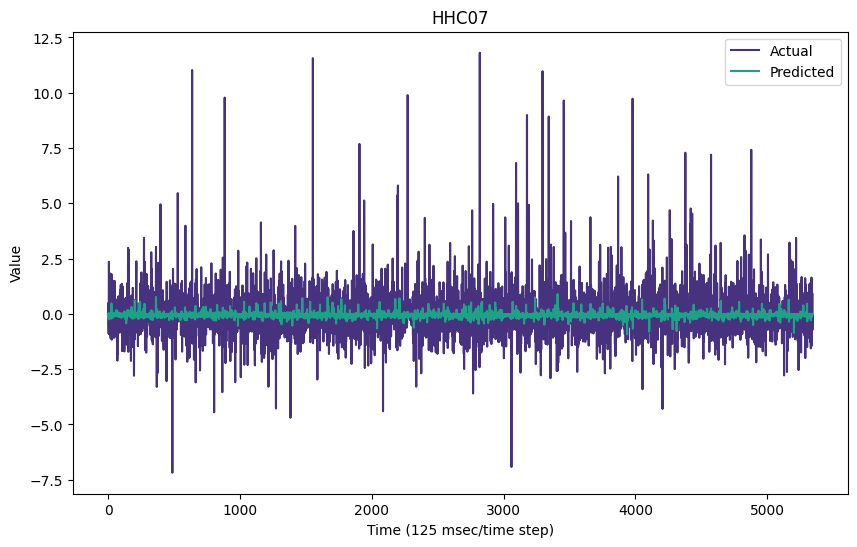

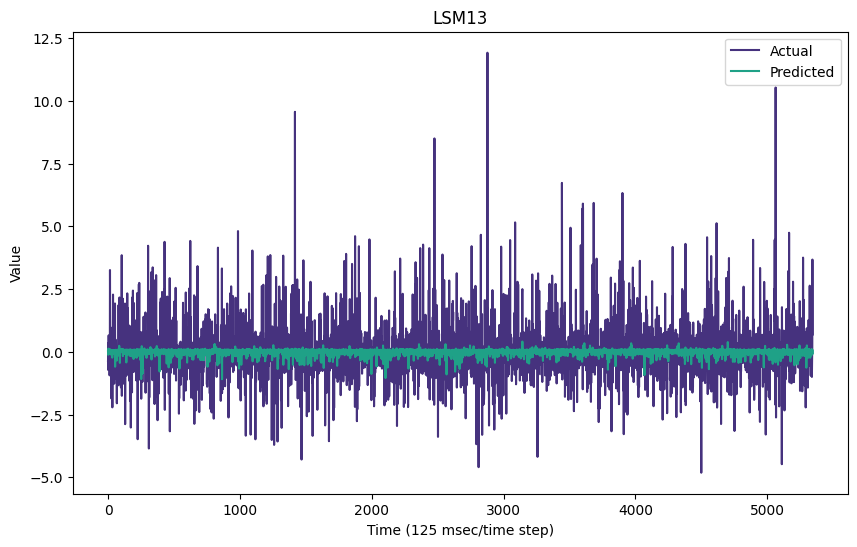

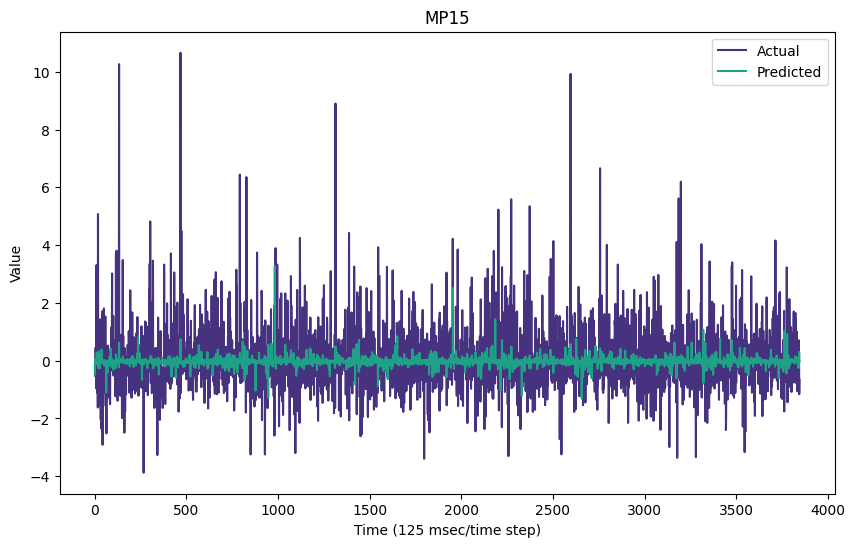

In [82]:
# make the index the the row number
HHC07_best = HHC07_best.reset_index(drop=True)

# plot
plt.figure(figsize=(10,6))
plt.plot(HHC07_best['Actual'], label='Actual', color= colors[0])
plt.plot(HHC07_best['Predicted'], label='Predicted', color= colors[3])
plt.xlabel('Time (125 msec/time step)')
plt.ylabel('Value')
plt.title('HHC07')
plt.legend()

# save the plot
plt.savefig('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/ThesisPlots/Results/EPICLE/HHC07/HHC07r1e1001.png')

# make the index the the row number
LSM13_best = LSM13_best.reset_index(drop=True)

# plot
plt.figure(figsize=(10,6))
plt.plot(LSM13_best['Actual'], label='Actual', color= colors[0])
plt.plot(LSM13_best['Predicted'], label='Predicted', color= colors[3])
plt.xlabel('Time (125 msec/time step)')
plt.ylabel('Value')
plt.title('LSM13')
plt.legend()

# save the plot
plt.savefig('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/ThesisPlots/Results/EPICLE/LSM13/LSM13r1e1001.png')

# make the index the the row number
MP15_best = MP15_best.reset_index(drop=True)

# plot
plt.figure(figsize=(10,6))
plt.plot(MP15_best['Actual'], label='Actual', color= colors[0])
plt.plot(MP15_best['Predicted'], label='Predicted', color= colors[3])
plt.xlabel('Time (125 msec/time step)')
plt.ylabel('Value')
plt.title('MP15')
plt.legend()

# save the plot
plt.savefig('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/ThesisPlots/Results/EPICLE/MP15/MP15r1e1001.png')


The following section shows how to get measures such as dtw and correlation between the timeseries

In [83]:
# load the two timeseries (txt files)
with open('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/HRV-RR/HHC07/HHC07_S06_20190403_P_RR.txt') as f:
    HHC07_P = f.readlines()
with open('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/HRV-RR/HHC07/HHC07_S06_20190403_T_RR.txt') as f:
    HHC07_T = f.readlines()


with open('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/HRV-RR/LSM13/LSM13_S03_20170919_P_RR.txt') as f:
    LSM13_P = f.readlines()
with open('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/HRV-RR/LSM13/LSM13_S03_20170919_T_RR.txt') as f:
    LSM13_T = f.readlines()


with open('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/HRV-RR/MP15/MP15_S11_20170518_P_RR.txt') as f:
    MP15_P = f.readlines()
with open('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/HRV-RR/MP15/MP15_S11_20170518_T_RR.txt') as f:
    MP15_T = f.readlines()

In [84]:
# put lines in a dataframe
HHC07_P = pd.DataFrame(HHC07_P)
HHC07_T = pd.DataFrame(HHC07_T)
# merge the two dataframes (one has more rows than the other)
df_2 = pd.concat([HHC07_P, HHC07_T], axis=1)
# rename columns
df_2.columns = ['Patient', 'Therapist']
# remove first 5 rows
df_2 = df_2.iloc[7:]
# remove ,\n from the end of each row
df_2['Patient'] = df_2['Patient'].str.replace(',\n', '')
df_2['Therapist'] = df_2['Therapist'].str.replace(',\n', '')
# make the columns numeric
df_2['Patient'] = pd.to_numeric(df_2['Patient'])
df_2['Therapist'] = pd.to_numeric(df_2['Therapist'])
# drop rows with NaN values
df_2 = df_2.dropna()



# put lines in a dataframe
LSM13_P = pd.DataFrame(LSM13_P)
LSM13_T = pd.DataFrame(LSM13_T)
# merge the two dataframes (one has more rows than the other)
df_3 = pd.concat([LSM13_P, LSM13_T], axis=1)
# rename columns
df_3.columns = ['Patient', 'Therapist']
# remove first 5 rows
df_3 = df_3.iloc[7:]
# remove ,\n from the end of each row
df_3['Patient'] = df_3['Patient'].str.replace(',\n', '')
df_3['Therapist'] = df_3['Therapist'].str.replace(',\n', '')
# make the columns numeric
df_3['Patient'] = pd.to_numeric(df_3['Patient'])
df_3['Therapist'] = pd.to_numeric(df_3['Therapist'])
# drop rows with NaN values
df_3 = df_3.dropna()


# put lines in a dataframe
MP15_P = pd.DataFrame(MP15_P)
MP15_T = pd.DataFrame(MP15_T)
# merge the two dataframes (one has more rows than the other)
df_4 = pd.concat([MP15_P, MP15_T], axis=1)
# rename columns
df_4.columns = ['Patient', 'Therapist']
# remove first 5 rows
df_4 = df_4.iloc[7:]
# remove ,\n from the end of each row
df_4['Patient'] = df_4['Patient'].str.replace(',\n', '')
df_4['Therapist'] = df_4['Therapist'].str.replace(',\n', '')
# make the columns numeric
df_4['Patient'] = pd.to_numeric(df_4['Patient'])
df_4['Therapist'] = pd.to_numeric(df_4['Therapist'])
# drop rows with NaN values
df_4 = df_4.dropna()



In [16]:
alignment = dtw(df_2['Patient'], df_2['Therapist'], keep_internals=True)

In [73]:
alignmentLSM13 = dtw(df_3['Patient'], df_3['Therapist'], keep_internals=True)

In [85]:
alignmentMP15 = dtw(df_4['Patient'], df_4['Therapist'], keep_internals=True)

In [86]:
dtw_distiance = alignment.distance
# calculate the correlation between the two timeseries
corr = df_2['Patient'].corr(df_2['Therapist'])
HHC07_best['DTW'] = dtw_distiance
HHC07_best['Correlation'] = corr


dtw_distianceLSM13 = alignmentLSM13.distance
# calculate the correlation between the two timeseries
corrLSM13 = df_3['Patient'].corr(df_3['Therapist'])
LSM13_best['DTW'] = dtw_distianceLSM13
LSM13_best['Correlation'] = corrLSM13


dtw_distianceMP15 = alignmentMP15.distance
# calculate the correlation between the two timeseries
corrMP15 = df_4['Patient'].corr(df_4['Therapist'])
MP15_best['DTW'] = dtw_distianceMP15
MP15_best['Correlation'] = corrMP15



In [89]:
# save the dataframes to csv
HHC07_best.to_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/ThesisPlots/Results/EPICLE/HHC07/HHC07r1e1001_best.csv', index=False)
LSM13_best.to_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/ThesisPlots/Results/EPICLE/LSM13/LSM13r1e1001_best.csv', index=False)
MP15_best.to_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/ThesisPlots/Results/EPICLE/MP15/MP15r1e1001_best.csv', index=False)